In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/Pritam Laskar/Documents/PGCM - DA/Term II/Term II Study Materials/203 (ML)/ML 01 Linear Regression Case 02/ML+01+Linear+Regression+Dataset+2.csv")

# EDA

In [3]:
df

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Home.Ownership,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,81174.0,20000,20000.00,0.09,36 months,debt_consolidation,0.15,MORTGAGE,6541.67,14,14272,2,1 year
1,99592.0,19200,19200.00,0.12,36 months,debt_consolidation,0.28,MORTGAGE,4583.33,12,11140,1,2 years
2,80059.0,35000,35000.00,0.22,60 months,debt_consolidation,0.24,MORTGAGE,11500.00,14,21977,1,2 years
3,15825.0,10000,9975.00,0.10,36 months,debt_consolidation,0.14,MORTGAGE,3833.33,10,9346,0,5 years
4,33182.0,12000,12000.00,0.12,36 months,credit_card,0.19,RENT,3195.00,11,14469,0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,23735.0,30000,29950.00,0.17,60 months,debt_consolidation,0.19,MORTGAGE,9250.00,15,45880,1,8 years
2496,65882.0,16000,16000.00,0.14,60 months,home_improvement,0.22,OWN,8903.25,18,18898,1,10+ years
2497,55610.0,10000,10000.00,0.14,36 months,debt_consolidation,0.05,MORTGAGE,2166.67,4,4544,0,10+ years
2498,38576.0,6000,6000.00,0.12,36 months,major_purchase,0.17,RENT,3500.00,8,1275,0,5 years


In [4]:
df.shape

(2500, 13)

In [5]:
df.duplicated().sum()

0

In [6]:
(df.isnull().sum()/len(df))*100

ID                                0.04
Amount.Requested                  0.00
Amount.Funded.By.Investors        0.00
Interest.Rate                     0.00
Loan.Length                       0.04
Loan.Purpose                      0.04
Debt.To.Income.Ratio              0.00
Home.Ownership                    0.04
Monthly.Income                    0.00
Open.CREDIT.Lines                 0.00
Revolving.CREDIT.Balance          0.00
Inquiries.in.the.Last.6.Months    0.00
Employment.Length                 3.12
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2499 non-null   float64
 1   Amount.Requested                2500 non-null   int64  
 2   Amount.Funded.By.Investors      2500 non-null   float64
 3   Interest.Rate                   2500 non-null   float64
 4   Loan.Length                     2499 non-null   object 
 5   Loan.Purpose                    2499 non-null   object 
 6   Debt.To.Income.Ratio            2500 non-null   float64
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2500 non-null   float64
 9   Open.CREDIT.Lines               2500 non-null   int64  
 10  Revolving.CREDIT.Balance        2500 non-null   int64  
 11  Inquiries.in.the.Last.6.Months  2500 non-null   int64  
 12  Employment.Length               24

In [8]:
df.describe()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
count,2499.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,51643.325330,12389.590000,11984.346044,0.130396,0.153752,5685.153348,10.060800,15225.668800,0.910400
std,30053.637661,7814.420929,7743.480223,0.041301,0.075164,3963.376189,4.516687,18308.723678,1.235064
min,10.000000,1000.000000,200.000000,0.050000,0.000000,588.500000,2.000000,0.000000,0.000000
25%,26570.500000,6000.000000,6000.000000,0.100000,0.100000,3474.267500,7.000000,5545.250000,0.000000
50%,50673.000000,10000.000000,10000.000000,0.130000,0.150000,5000.000000,9.000000,10938.000000,1.000000
75%,77583.000000,17000.000000,16000.000000,0.160000,0.210000,6800.000000,13.000000,18870.250000,1.000000
max,104202.000000,35000.000000,35000.000000,0.250000,0.350000,102750.000000,38.000000,270800.000000,9.000000


In [9]:
df.nunique()

ID                                2499
Amount.Requested                   380
Amount.Funded.By.Investors         708
Interest.Rate                       21
Loan.Length                          3
Loan.Purpose                        14
Debt.To.Income.Ratio                36
Home.Ownership                       5
Monthly.Income                     632
Open.CREDIT.Lines                   29
Revolving.CREDIT.Balance          2349
Inquiries.in.the.Last.6.Months      10
Employment.Length                   10
dtype: int64

In [10]:
df.columns = df.columns.str.replace('.', '_')

C:\Users\Pritam Laskar\AppData\Local\Temp\ipykernel_38840\2262415099.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '_')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2499 non-null   float64
 1   Amount_Requested                2500 non-null   int64  
 2   Amount_Funded_By_Investors      2500 non-null   float64
 3   Interest_Rate                   2500 non-null   float64
 4   Loan_Length                     2499 non-null   object 
 5   Loan_Purpose                    2499 non-null   object 
 6   Debt_To_Income_Ratio            2500 non-null   float64
 7   Home_Ownership                  2499 non-null   object 
 8   Monthly_Income                  2500 non-null   float64
 9   Open_CREDIT_Lines               2500 non-null   int64  
 10  Revolving_CREDIT_Balance        2500 non-null   int64  
 11  Inquiries_in_the_Last_6_Months  2500 non-null   int64  
 12  Employment_Length               24

In [12]:
df['Loan_Length'].unique()

array(['36 months', '60 months', '.', nan], dtype=object)

In [13]:
df['Loan_Length'] = df['Loan_Length'].str.split(' ', expand = True)[0]

In [14]:
df['Loan_Length'] = df['Loan_Length'].str.replace('.', '36')

C:\Users\Pritam Laskar\AppData\Local\Temp\ipykernel_38840\1675706423.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Loan_Length'] = df['Loan_Length'].str.replace('.', '36')


In [15]:
df['Employment_Length'].unique()

array(['1 year', '2 years', '5 years', '9 years', '3 years', '10+ years',
       '8 years', '6 years', '7 years', '4 years', nan], dtype=object)

In [16]:
df['Employment_Length'] = df['Employment_Length'].str.split(' ', expand = True)[0]
df['Employment_Length'] = df['Employment_Length'].str.replace('+', '')

C:\Users\Pritam Laskar\AppData\Local\Temp\ipykernel_38840\2570686075.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Employment_Length'] = df['Employment_Length'].str.replace('+', '')


In [17]:
df['Employment_Length'].unique()

array(['1', '2', '5', '9', '3', '10', '8', '6', '7', '4', nan],
      dtype=object)

In [18]:
df['Employment_Length'] = df['Employment_Length'].fillna(df['Employment_Length'].mode()[0])

In [19]:
df['Employment_Length'].unique()

array(['1', '2', '5', '9', '3', '10', '8', '6', '7', '4'], dtype=object)

In [20]:
(df.isnull().sum()/len(df))*100

ID                                0.04
Amount_Requested                  0.00
Amount_Funded_By_Investors        0.00
Interest_Rate                     0.00
Loan_Length                       0.04
Loan_Purpose                      0.04
Debt_To_Income_Ratio              0.00
Home_Ownership                    0.04
Monthly_Income                    0.00
Open_CREDIT_Lines                 0.00
Revolving_CREDIT_Balance          0.00
Inquiries_in_the_Last_6_Months    0.00
Employment_Length                 0.00
dtype: float64

In [21]:
df.dtypes

ID                                float64
Amount_Requested                    int64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                        object
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
Home_Ownership                     object
Monthly_Income                    float64
Open_CREDIT_Lines                   int64
Revolving_CREDIT_Balance            int64
Inquiries_in_the_Last_6_Months      int64
Employment_Length                  object
dtype: object

In [22]:
df['Loan_Length'] = df['Loan_Length'].fillna(df['Loan_Length'].mode()[0])
df['Loan_Purpose'] = df['Loan_Purpose'].fillna(df['Loan_Purpose'].mode()[0])
df['Home_Ownership'] = df['Home_Ownership'].fillna(df['Home_Ownership'].mode()[0])

In [23]:
df.drop(['ID'], axis = 1, inplace = True)

In [24]:
df['Home_Ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'OTHER', 'NONE'], dtype=object)

In [25]:
df['Home_Ownership'].value_counts(ascending = False)

MORTGAGE    1148
RENT        1146
OWN          200
OTHER          5
NONE           1
Name: Home_Ownership, dtype: int64

In [26]:
df['Home_Ownership'].replace(to_replace = ['OTHER', 'NONE'], value = 'OWN', inplace = True)

In [27]:
df['Loan_Purpose'].unique()

array(['debt_consolidation', 'credit_card', 'other', 'moving', 'car',
       'vacation', 'home_improvement', 'house', 'major_purchase',
       'educational', 'medical', 'wedding', 'small_business',
       'renewable_energy'], dtype=object)

In [28]:
df['Loan_Purpose'].value_counts()

debt_consolidation    1308
credit_card            444
other                  200
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan_Purpose, dtype: int64

In [29]:
df['Loan_Purpose'].replace(to_replace = ['car', 'wedding', 'moving', 'vacation', 'renewable_energy'],value = 'other', inplace = True)
df['Loan_Purpose'].replace(to_replace = ['home_improvement'], value = 'house', inplace = True)
df['Loan_Purpose'].replace(to_replace = ['educational','medical'],value = 'Personal', inplace = True)

In [30]:
df['Loan_Purpose'].value_counts()

debt_consolidation    1308
credit_card            444
other                  343
house                  172
major_purchase         101
small_business          87
Personal                45
Name: Loan_Purpose, dtype: int64

In [31]:
df['Monthly_Income'] = df['Monthly_Income'].round(2)

In [32]:
df['Employment_Length'] = df['Employment_Length'].astype(int)
df['Loan_Length'] = df['Loan_Length'].astype(int)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2500 non-null   int64  
 1   Amount_Funded_By_Investors      2500 non-null   float64
 2   Interest_Rate                   2500 non-null   float64
 3   Loan_Length                     2500 non-null   int32  
 4   Loan_Purpose                    2500 non-null   object 
 5   Debt_To_Income_Ratio            2500 non-null   float64
 6   Home_Ownership                  2500 non-null   object 
 7   Monthly_Income                  2500 non-null   float64
 8   Open_CREDIT_Lines               2500 non-null   int64  
 9   Revolving_CREDIT_Balance        2500 non-null   int64  
 10  Inquiries_in_the_Last_6_Months  2500 non-null   int64  
 11  Employment_Length               2500 non-null   int32  
dtypes: float64(4), int32(2), int64(4),

In [34]:
df.describe()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,12389.590000,11984.346044,0.130396,41.260800,0.153752,5685.153348,10.060800,15225.668800,0.910400,5.632800
std,7814.420929,7743.480223,0.041301,9.930893,0.075164,3963.376189,4.516687,18308.723678,1.235064,3.478333
min,1000.000000,200.000000,0.050000,36.000000,0.000000,588.500000,2.000000,0.000000,0.000000,1.000000
25%,6000.000000,6000.000000,0.100000,36.000000,0.100000,3474.267500,7.000000,5545.250000,0.000000,2.000000
50%,10000.000000,10000.000000,0.130000,36.000000,0.150000,5000.000000,9.000000,10938.000000,1.000000,5.000000
75%,17000.000000,16000.000000,0.160000,36.000000,0.210000,6800.000000,13.000000,18870.250000,1.000000,10.000000
max,35000.000000,35000.000000,0.250000,60.000000,0.350000,102750.000000,38.000000,270800.000000,9.000000,10.000000


# Univariate Analysis

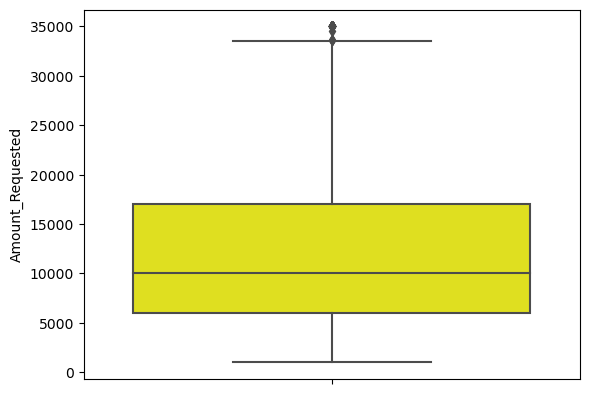

In [35]:
# Amount_Requested

sns.boxplot(data = df, y = 'Amount_Requested', color = 'yellow');

In [36]:
Q3 = df['Amount_Requested'].quantile(.75)
Q1 = df['Amount_Requested'].quantile(.25)
IQR = Q3 - Q1
UL = Q3 + 1.5*(IQR)
LL = Q3 - 1.5*(IQR)
print(UL)
print(LL)

33500.0
500.0


In [37]:
df['Amount_Requested'] = np.where(df['Amount_Requested'] > 33500, 33500, np.where(df['Amount_Requested'] < 500, 500, df['Amount_Requested']))

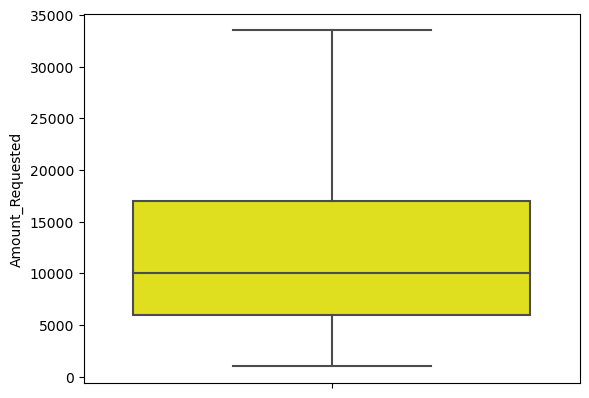

In [38]:
sns.boxplot(data = df, y = 'Amount_Requested', color = 'yellow');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


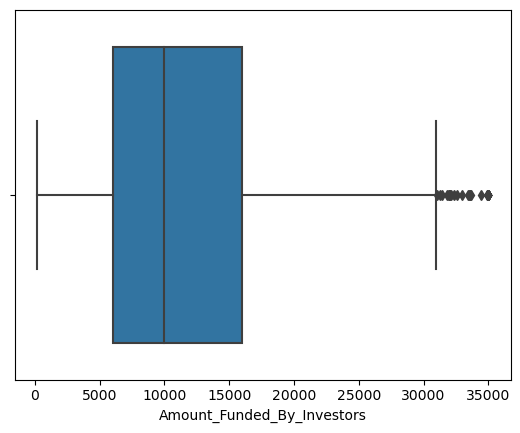

In [39]:
# Amount_Funded_By_Investors

sns.boxplot(df['Amount_Funded_By_Investors']);

In [40]:
Q3 = df['Amount_Funded_By_Investors'].quantile(.75)
Q1 = df['Amount_Funded_By_Investors'].quantile(.25)
IQR = Q3 - Q1
UL = Q3 + 1.5*(IQR)
LL = Q3 - 1.5*(IQR)
print(UL)
print(LL)

31000.0
1000.0


In [41]:
df['Amount_Funded_By_Investors'] = np.where(df['Amount_Funded_By_Investors'] > 31000, 31000, np.where(df['Amount_Funded_By_Investors'] < 1000, 1000, df['Amount_Funded_By_Investors']))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


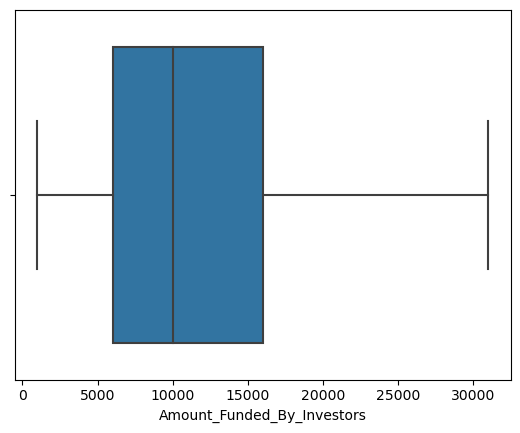

In [42]:
sns.boxplot(df['Amount_Funded_By_Investors']);

Text(0.5, 1.0, 'Distribution of Interest Rate')

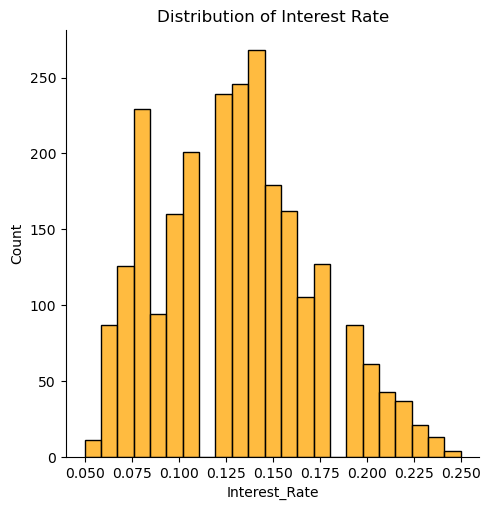

In [43]:
# Interest_Rate

sns.displot(df['Interest_Rate'], color = 'orange');
plt.title('Distribution of Interest Rate')

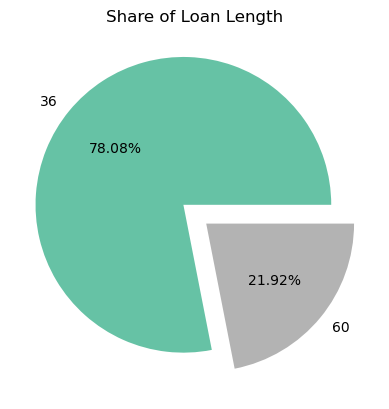

In [44]:
# Loan Length

df['Loan_Length'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = [0.1, 0.1], cmap = 'Set2');
plt.title('Share of Loan Length');
plt.ylabel('');

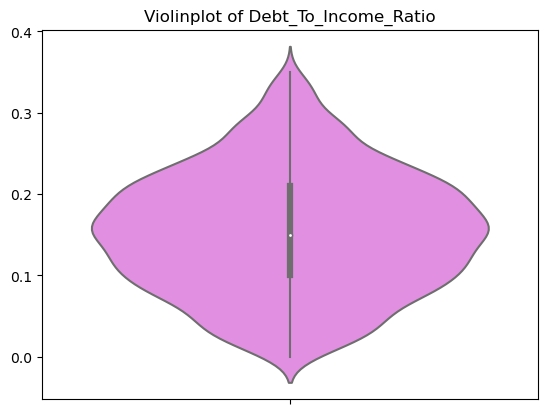

In [45]:
# Debt_To_Income_Ratio

sns.violinplot(data = df, y = 'Debt_To_Income_Ratio', color = 'violet');
plt.title('Violinplot of Debt_To_Income_Ratio');
plt.ylabel('');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


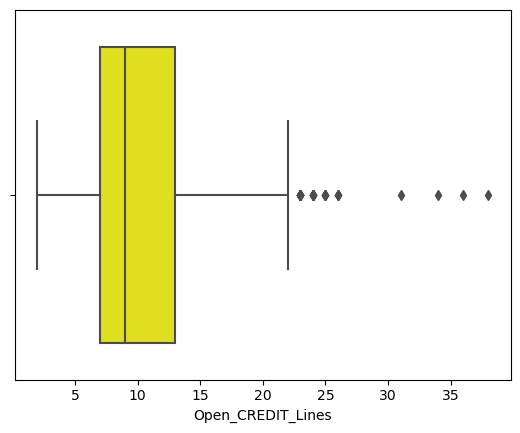

In [46]:
# Open_CREDIT_Lines

sns.boxplot(df['Open_CREDIT_Lines'], color = 'yellow');

In [47]:
Q3 = df['Open_CREDIT_Lines'].quantile(.75)
Q1 = df['Open_CREDIT_Lines'].quantile(.25)
IQR = Q3 - Q1
UL = Q3 + 1.5*(IQR)
LL = Q3 - 1.5*(IQR)
print(UL)
print(LL)

22.0
4.0


In [48]:
df['Open_CREDIT_Lines'] = np.where(df['Open_CREDIT_Lines'] > 22, 22, np.where(df['Open_CREDIT_Lines'] < 4, 4, df['Open_CREDIT_Lines']))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


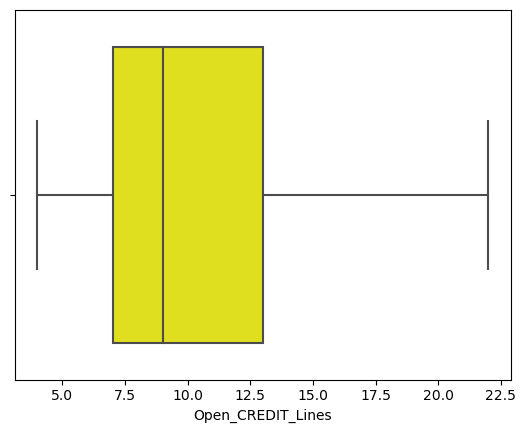

In [49]:
sns.boxplot(df['Open_CREDIT_Lines'], color = 'yellow');

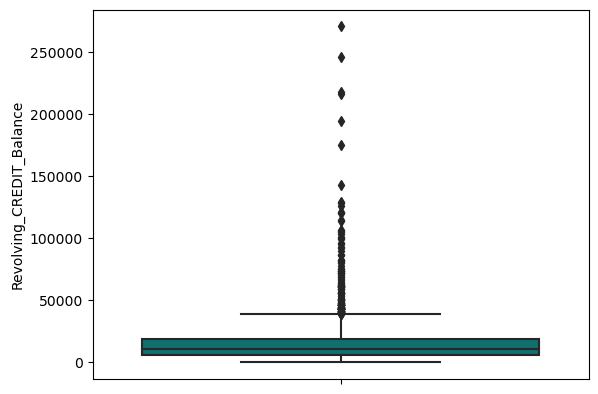

In [50]:
# Revolving_CREDIT_Balance

sns.boxplot(data = df, y = 'Revolving_CREDIT_Balance', color = 'teal');

In [51]:
Q3 = df['Revolving_CREDIT_Balance'].quantile(.75)
Q1 = df['Revolving_CREDIT_Balance'].quantile(.25)
IQR = Q3 - Q1
UL = Q3 + 1.5*(IQR)
LL = Q3 - 1.5*(IQR)
print(UL)
print(LL)

38857.75
-1117.25


In [52]:
df['Revolving_CREDIT_Balance'] = np.where(df['Revolving_CREDIT_Balance'] > 38857.75, 38857.75, np.where(df['Revolving_CREDIT_Balance'] < -1117.25, -1117.25, df['Revolving_CREDIT_Balance']))

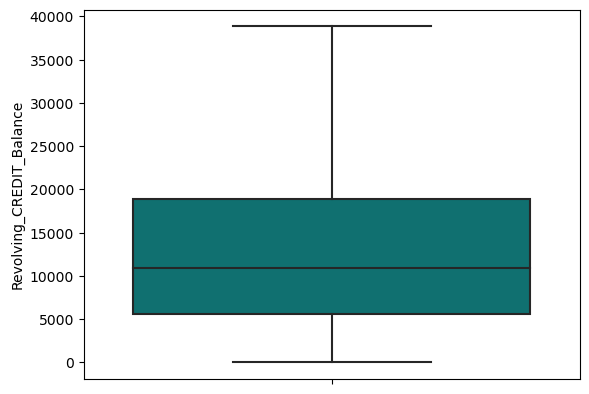

In [53]:
sns.boxplot(data = df, y = 'Revolving_CREDIT_Balance', color = 'teal');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


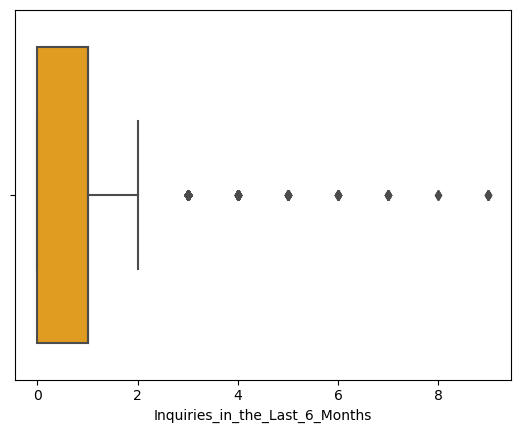

In [54]:
# Inquiries_in_the_Last_6_Months

sns.boxplot(df['Inquiries_in_the_Last_6_Months'], color = 'orange');

In [55]:
Q3 = df['Inquiries_in_the_Last_6_Months'].quantile(.75)
Q1 = df['Inquiries_in_the_Last_6_Months'].quantile(.25)
IQR = Q3 - Q1
UL = Q3 + 1.5*(IQR)
LL = Q3 - 1.5*(IQR)
print(UL)
print(LL)

2.5
-0.5


In [56]:
df['Inquiries_in_the_Last_6_Months'] = np.where(df['Inquiries_in_the_Last_6_Months'] > 2.5, 2.5, np.where(df['Inquiries_in_the_Last_6_Months'] < -0.5, -0.5, df['Inquiries_in_the_Last_6_Months']))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


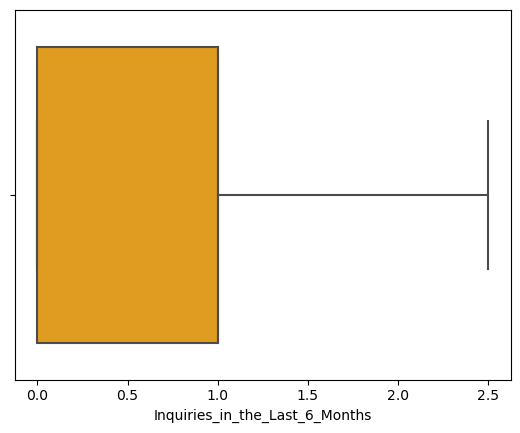

In [57]:
sns.boxplot(df['Inquiries_in_the_Last_6_Months'], color = 'orange');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


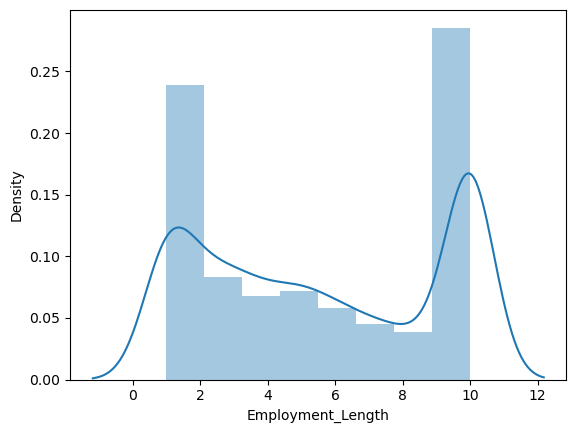

In [58]:
sns.distplot(df['Employment_Length']);

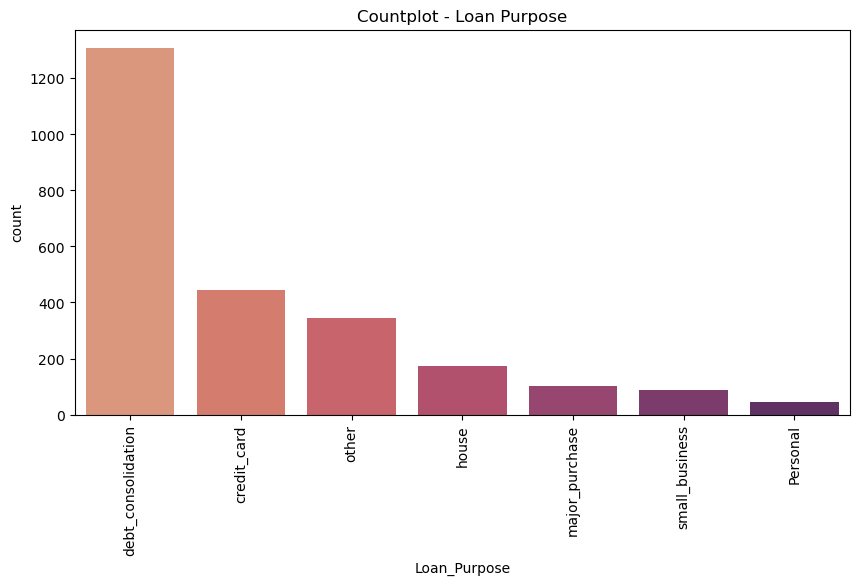

In [59]:
# Loan Purpose

order = df['Loan_Purpose'].value_counts(ascending = False);
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'Loan_Purpose', palette = 'flare', order = order.index);
plt.xticks(rotation = 90);
plt.title('Countplot - Loan Purpose');

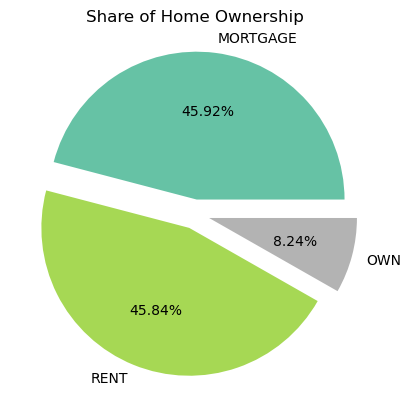

In [60]:
# Home Ownership

df['Home_Ownership'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = [0.1, 0.1, 0.1], cmap = 'Set2');
plt.title('Share of Home Ownership');
plt.ylabel('');

# Multivariate Analysis

In [61]:
df.describe()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,12358.470000,11909.515940,0.130396,41.260800,0.153752,5685.153348,10.063600,13547.596300,0.789600,5.632800
std,7726.799945,7508.979836,0.041301,9.930893,0.075164,3963.376189,4.306248,10526.367863,0.906786,3.478333
min,1000.000000,1000.000000,0.050000,36.000000,0.000000,588.500000,4.000000,0.000000,0.000000,1.000000
25%,6000.000000,6000.000000,0.100000,36.000000,0.100000,3474.267500,7.000000,5545.250000,0.000000,2.000000
50%,10000.000000,10000.000000,0.130000,36.000000,0.150000,5000.000000,9.000000,10938.000000,1.000000,5.000000
75%,17000.000000,16000.000000,0.160000,36.000000,0.210000,6800.000000,13.000000,18870.250000,1.000000,10.000000
max,33500.000000,31000.000000,0.250000,60.000000,0.350000,102750.000000,22.000000,38857.750000,2.500000,10.000000


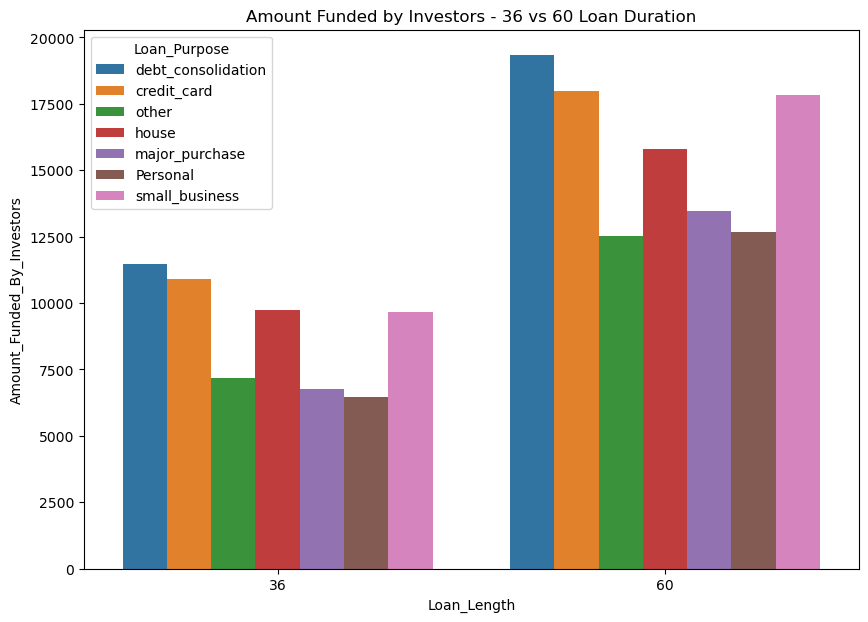

In [62]:
plt.figure(figsize = (10,7))
plt.title('Amount Funded by Investors - 36 vs 60 Loan Duration');
sns.barplot(data = df, x = 'Loan_Length', y = 'Amount_Funded_By_Investors', hue = 'Loan_Purpose', ci = None);

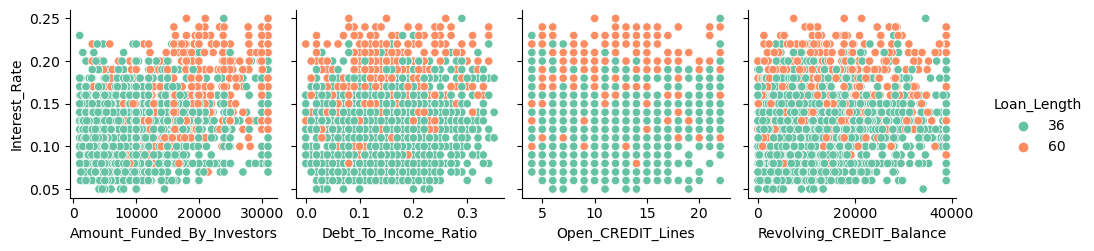

In [63]:
# Interest Rate
sns.pairplot(data = df, x_vars = ['Amount_Funded_By_Investors', 'Debt_To_Income_Ratio', 'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance'], y_vars = 'Interest_Rate', hue = 'Loan_Length', palette = 'Set2');


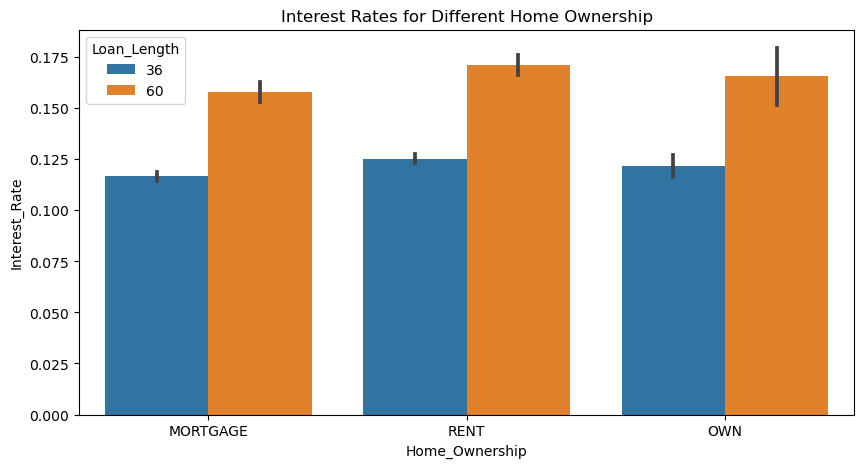

In [64]:
# Interest Rate vs Home Ownership

plt.figure(figsize = (10,5))
sns.barplot(data = df, x = 'Home_Ownership', y = 'Interest_Rate', hue = 'Loan_Length', estimator = np.mean);
plt.title('Interest Rates for Different Home Ownership');

# Multicollinearity Check 

In [65]:
df_cat = df.select_dtypes(include = 'object')
df_num = df.select_dtypes(include = np.number)


In [66]:
df_dummy = pd.get_dummies(df_cat, drop_first = True)
df_dummy

,Loan_Purpose_credit_card,Loan_Purpose_debt_consolidation,Loan_Purpose_house,Loan_Purpose_major_purchase,Loan_Purpose_other,Loan_Purpose_small_business,Home_Ownership_OWN,Home_Ownership_RENT
0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
2495,0,1,0,0,0,0,0,0
2496,0,0,1,0,0,0,1,0
2497,0,1,0,0,0,0,0,0
2498,0,0,0,1,0,0,0,1


In [67]:
data = pd.concat([df_dummy, df_num], axis = 1)

<AxesSubplot:>

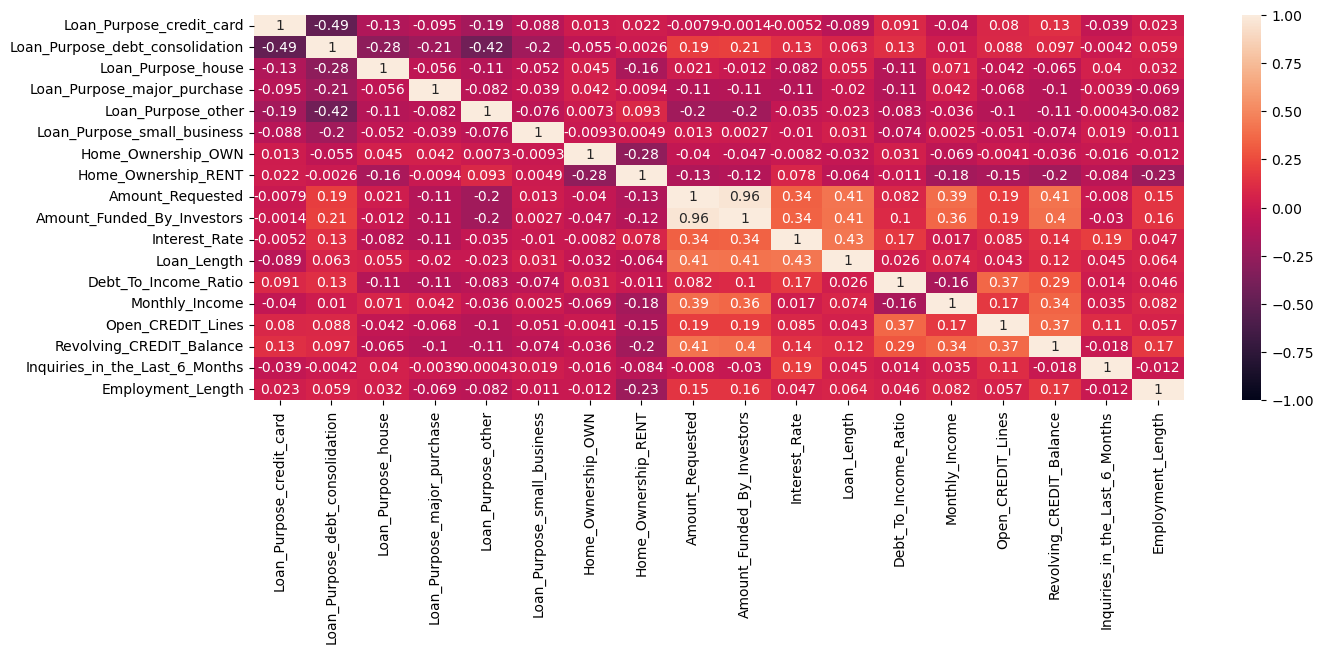

In [68]:
plt.figure(figsize = (15, 5))
sns.heatmap(data.corr(), annot = True, vmin = -1, vmax = 1)

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data

""


In [70]:
vif_data['features'] = data.columns
vif_data['features']

0            Loan_Purpose_credit_card
1     Loan_Purpose_debt_consolidation
2                  Loan_Purpose_house
3         Loan_Purpose_major_purchase
4                  Loan_Purpose_other
5         Loan_Purpose_small_business
6                  Home_Ownership_OWN
7                 Home_Ownership_RENT
8                    Amount_Requested
9          Amount_Funded_By_Investors
10                      Interest_Rate
11                        Loan_Length
12               Debt_To_Income_Ratio
13                     Monthly_Income
14                  Open_CREDIT_Lines
15           Revolving_CREDIT_Balance
16     Inquiries_in_the_Last_6_Months
17                  Employment_Length
Name: features, dtype: object

In [71]:
vif_data['VIP'] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
vif_data

,features,VIP
0,Loan_Purpose_credit_card,4.948657
1,Loan_Purpose_debt_consolidation,13.062631
2,Loan_Purpose_house,2.515426
3,Loan_Purpose_major_purchase,1.837416
4,Loan_Purpose_other,4.000760
5,Loan_Purpose_small_business,1.759220
6,Home_Ownership_OWN,1.205963
7,Home_Ownership_RENT,2.280280
8,Amount_Requested,54.112835
9,Amount_Funded_By_Investors,51.929133


In [72]:
data.drop(['Amount_Requested'], axis = 1, inplace = True)

# As a rule of thumb, we remove columns with VIF > 5
# As 'Amount_Requested' had highest VIF, we had removed it

In [73]:
data.columns

Index(['Loan_Purpose_credit_card', 'Loan_Purpose_debt_consolidation',
       'Loan_Purpose_house', 'Loan_Purpose_major_purchase',
       'Loan_Purpose_other', 'Loan_Purpose_small_business',
       'Home_Ownership_OWN', 'Home_Ownership_RENT',
       'Amount_Funded_By_Investors', 'Interest_Rate', 'Loan_Length',
       'Debt_To_Income_Ratio', 'Monthly_Income', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length'],
      dtype='object')

In [74]:
vif_data = pd.DataFrame()

In [75]:
vif_data['features'] = data.columns
vif_data['features']

0            Loan_Purpose_credit_card
1     Loan_Purpose_debt_consolidation
2                  Loan_Purpose_house
3         Loan_Purpose_major_purchase
4                  Loan_Purpose_other
5         Loan_Purpose_small_business
6                  Home_Ownership_OWN
7                 Home_Ownership_RENT
8          Amount_Funded_By_Investors
9                       Interest_Rate
10                        Loan_Length
11               Debt_To_Income_Ratio
12                     Monthly_Income
13                  Open_CREDIT_Lines
14           Revolving_CREDIT_Balance
15     Inquiries_in_the_Last_6_Months
16                  Employment_Length
Name: features, dtype: object

In [76]:
vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
vif_data

,features,VIF
0,Loan_Purpose_credit_card,4.944104
1,Loan_Purpose_debt_consolidation,13.055311
2,Loan_Purpose_house,2.509486
3,Loan_Purpose_major_purchase,1.833418
4,Loan_Purpose_other,3.993739
5,Loan_Purpose_small_business,1.758729
6,Home_Ownership_OWN,1.205448
7,Home_Ownership_RENT,2.279228
8,Amount_Funded_By_Investors,5.845470
9,Interest_Rate,15.581856


In [77]:
data.drop(['Loan_Length'], axis = 1, inplace = True)

# Now we removed 'Loan_Length' and will check VIF again below

In [78]:
vif_data = pd.DataFrame()

In [79]:
vif_data['features'] = data.columns
vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
vif_data

,features,VIF
0,Loan_Purpose_credit_card,4.193620
1,Loan_Purpose_debt_consolidation,10.528919
2,Loan_Purpose_house,2.024777
3,Loan_Purpose_major_purchase,1.551888
4,Loan_Purpose_other,3.177810
5,Loan_Purpose_small_business,1.544732
6,Home_Ownership_OWN,1.205408
7,Home_Ownership_RENT,2.279180
8,Amount_Funded_By_Investors,5.418154
9,Interest_Rate,12.971441


In [80]:
data.drop(['Loan_Purpose_debt_consolidation'], axis = 1, inplace = True)

# We will remove 'Loan_Purpose_debt_consolidation' as it has high VIF
# We cannot remove Interest Rate as it is our target column in this project

In [81]:
vif_data = pd.DataFrame()
vif_data['features'] = data.columns
vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
vif_data

,features,VIF
0,Loan_Purpose_credit_card,1.329845
1,Loan_Purpose_house,1.138942
2,Loan_Purpose_major_purchase,1.087720
3,Loan_Purpose_other,1.276697
4,Loan_Purpose_small_business,1.061673
5,Home_Ownership_OWN,1.190025
6,Home_Ownership_RENT,2.113128
7,Amount_Funded_By_Investors,5.403071
8,Interest_Rate,10.641236
9,Debt_To_Income_Ratio,6.616481


In [82]:
data.drop(['Open_CREDIT_Lines'], axis = 1, inplace = True)

# This time we will drop 'Open_CREDIT_Lines' as it has a high VIF

In [83]:
vif_data = pd.DataFrame()
vif_data['features'] = data.columns
vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
vif_data

,features,VIF
0,Loan_Purpose_credit_card,1.323169
1,Loan_Purpose_house,1.137125
2,Loan_Purpose_major_purchase,1.085832
3,Loan_Purpose_other,1.275885
4,Loan_Purpose_small_business,1.061257
5,Home_Ownership_OWN,1.188828
6,Home_Ownership_RENT,2.112111
7,Amount_Funded_By_Investors,5.398683
8,Interest_Rate,10.416665
9,Debt_To_Income_Ratio,5.425193


In [84]:
print("Now we are good to go with training as we have dropped columns with high VIF. Also note that VIF of our target columns, i.e., 'Interest Rate' has dropped from 15.58 to 10.41 which shows we have reduced multicollinearity upto a certain extent.")

Now we are good to go with training as we have dropped columns with high VIF. Also note that VIF of our target columns, i.e., 'Interest Rate' has dropped from 15.58 to 10.41 which shows we have reduced multicollinearity upto a certain extent.


# Linear Regression Model

In [85]:
x = data.drop(['Interest_Rate'], axis = 1)
y = data['Interest_Rate']

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [87]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [88]:
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean Squared Error = ', mse)
print('R2 Score = ', r_squared)

# MSE = Average Squared Difference between test and predicted values. The closer the MSE to 0, the more accurate is model.
# R2 Score = Goodness of fit, explains how much difference in variance of target variable explained by independent variables. 0 is bad, 1 is good

Mean Squared Error =  0.0013041418103658673
R2 Score =  0.212335737696701


In [89]:
# Now we will scale our model

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)
lr = LinearRegression()
lr.fit(x_train2, y_train)
y_pred2 = lr.predict(x_test2)

In [90]:
from sklearn.metrics import r2_score, mean_squared_error
mse_scaled = mean_squared_error(y_test, y_pred2)
r_squared_scaled = r2_score(y_test, y_pred2)
print('Scaled Mean Squared Error = ', mse_scaled)
print('Scaled R2 Score = ', r_squared_scaled)

Scaled Mean Squared Error =  0.0013041418103658445
Scaled R2 Score =  0.21233573769671477
